In [1]:
# 흉부 X-ray 이미지로 정상/코로나/폐럼을 분류하는 Image Classification

In [5]:
import os
data_dir = './DATASET/Classification/train'

IMAGE_FORMAT = ['jpeg', 'jpg', 'png']
def list_image_files(data_dir, sub_dir):
    image_files = []
    images_dir = os.path.join(data_dir, sub_dir)
    for file_path in os.listdir(images_dir):
        if file_path.split(".")[-1] in IMAGE_FORMAT:
            image_files.append(os.path.join(sub_dir, file_path))
    return image_files

normals_list = list_image_files(data_dir, "Normal")
covids_list = list_image_files(data_dir, "Covid")
pneumonias_list = list_image_files(data_dir, "Viral Pneumonia")

In [12]:
print(f'Noraml: {len(normals_list)}')
print(f'Covid: {len(covids_list)}')
print(f"Pnue: {len(pneumonias_list)}")
print(normals_list)

Noraml: 70
Covid: 111
Pnue: 70
['Normal\\01.jpeg', 'Normal\\010.jpeg', 'Normal\\011.jpeg', 'Normal\\012.jpeg', 'Normal\\013.jpeg', 'Normal\\014.jpeg', 'Normal\\015.jpeg', 'Normal\\016.jpeg', 'Normal\\017.jpeg', 'Normal\\018.jpeg', 'Normal\\019.jpeg', 'Normal\\02.jpeg', 'Normal\\020.jpeg', 'Normal\\021.jpeg', 'Normal\\022.jpeg', 'Normal\\023.jpeg', 'Normal\\024.jpeg', 'Normal\\025.jpeg', 'Normal\\03.jpeg', 'Normal\\04.jpeg', 'Normal\\05.jpeg', 'Normal\\050.jpeg', 'Normal\\051.jpeg', 'Normal\\052.jpeg', 'Normal\\053.jpeg', 'Normal\\054.jpeg', 'Normal\\055.jpeg', 'Normal\\056.jpeg', 'Normal\\057.jpeg', 'Normal\\058.jpeg', 'Normal\\059.jpeg', 'Normal\\06.jpeg', 'Normal\\060.jpeg', 'Normal\\061.jpeg', 'Normal\\062.jpeg', 'Normal\\063.jpeg', 'Normal\\064.jpeg', 'Normal\\065.jpeg', 'Normal\\066.jpeg', 'Normal\\067.jpeg', 'Normal\\068.jpeg', 'Normal\\069.jpeg', 'Normal\\07.jpeg', 'Normal\\070.jpeg', 'Normal\\071.jpeg', 'Normal\\072.jpeg', 'Normal\\073.jpeg', 'Normal\\074.jpeg', 'Normal\\075.jp

In [7]:
# 이미지파일을 RGB 3차원 배열로 불러오기
import cv2

def get_RGB_image(data_dir, file_name):
    image_file = os.path.join(data_dir, file_name)
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
# 이미지 데이터 확인하기
import matplotlib.pyplot as plt
from ipywidgets import interact

min_num_files = min(len(normals_list), len(covids_list), len(pneumonias_list))
print(min_num_files)

70


In [10]:
@interact(index=(0, min_num_files-1))
def show_samples(index=0):
    normal_image = get_RGB_image(data_dir, normals_list[index])
    covid_image = get_RGB_image(data_dir, covids_list[index])
    pneumonia_image = get_RGB_image(data_dir, pneumonias_list[index])

    plt.figure(figsize=(12, 8))
    plt.subplot(131)
    plt.title('Normal')
    plt.imshow(normal_image)
    
    plt.subplot(132)
    plt.title('Covid')
    plt.imshow(covid_image)

    plt.subplot(133)
    plt.title('Pneumonia')
    plt.imshow(pneumonia_image)

interactive(children=(IntSlider(value=0, description='index', max=69), Output()), _dom_classes=('widget-intera…

In [11]:
# 학습데이터셋 클래스 구축
train_data_dir = './DATASET/Classification/train/'
class_list = ["Normal", "Covid", "Viral Pneumonia"]

In [15]:
import torch
class ChestDataset():
    def __init__(self, data_dir, transformer=None):
        self.data_dir = data_dir
        normals = list_image_files(data_dir, "Normal") #일반이미지
        covids = list_image_files(data_dir, "Covid") # 코로나 이미지
        pneumonias = list_image_files(data_dir, "Viral Pneumonia") # 폐렴 이미지

        self.files_path = normals + covids + pneumonias # 데이터 수 총 길이
        self.transformer = transformer
    
    def __len__(self):
        return len(self.files_path)

    def __getitem__(self, index):
        image_file = os.path.join(self.data_dir, self.files_path[index])
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        class_name = self.files_path[index].split(os.sep)[0]
        class_id = class_list.index(class_name)
        
        if self.transformer:
            image = self.transformer(image)
            class_id = torch.Tensor([class_id]).long()
        
        return image, class_id
        

In [16]:
dset = ChestDataset(data_dir=train_data_dir)
index = 0
image, target = dset[index]
print(image.shape)
print(target)

(1708, 1944, 3)
0


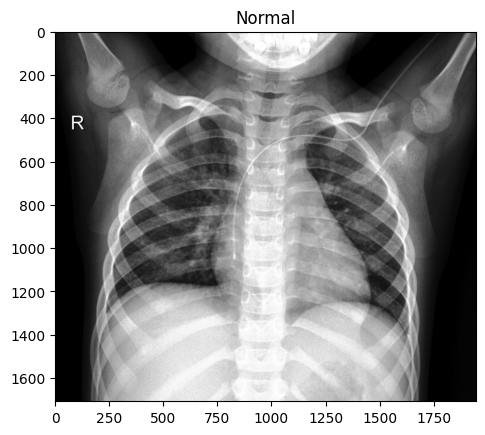

In [17]:
plt.title(class_list[target])
plt.imshow(image)

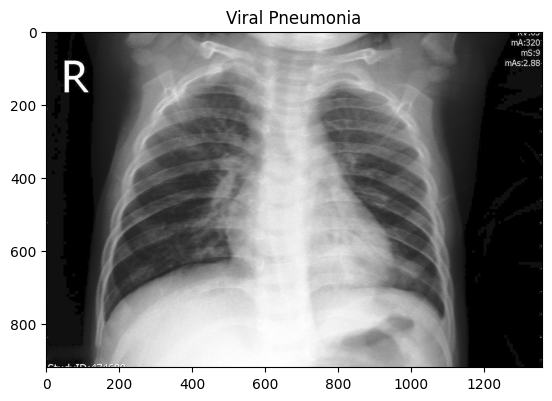

In [18]:
index = -10
image, target = dset[index]

plt.title(class_list[target])
plt.imshow(image)

In [19]:
len(dset)

251

In [22]:
# 연산 가능한 텐서형으로 데이터 변환하기
import torch
from torchvision import transforms

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dset = ChestDataset(train_data_dir, transformer)
index = 200
image = train_dset[index][0]
target = train_dset[index][1]
print(image.shape)
print(target)

torch.Size([3, 224, 224])
tensor([2])


In [23]:
image

tensor([[[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0.7669,  0.2206, -0.7700],
         [-0.5016, -0.4899, -0.5316,  ...,  0.9897, -0.9195, -0.7240],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9827,  0.2870,  0.9899,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9626,  0.1117, -0.9819,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0.7669,  0.2206, -0.7700],
         [-0.5016, -0.4899, -0.5316,  ...,  0.9897, -0.9195, -0.7240],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9827,  0.2870,  0.9899,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9626,  0.1117, -0.9819,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.5545, -0.4952, -0.5317,  ...,  0.9883,  0.6220, -0.7319],
         [-0.4914, -0.5102, -0.5333,  ..., -0

In [24]:
# 데이터로더 구현하기
from torch.utils.data import DataLoader

train_data_dir = "./DATASET/Classification/train/"
val_data_dir = "./DATASET/Classification/test/"

train_dset = ChestDataset(train_data_dir, transformer)
train_dloader = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
val_dset = ChestDataset(val_data_dir, transformer)
val_dloader = DataLoader(val_dset, batch_size=1, shuffle=False)

In [25]:
def build_dataloader(train_data_dir, val_data_dir):
    dataloader = {}
    train_dset = ChestDataset(train_data_dir, transformer)
    dataloader["train"] = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
    val_dset = ChestDataset(val_data_dir, transformer)
    dataloader["val"] = DataLoader(val_dset, batch_size=1, shuffle=False)
    return dataloader

In [26]:
dataloaders = build_dataloader(train_data_dir, val_data_dir)
print(dataloaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x000001EFB15A9810>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x000001EFB15F2BC0>}


In [ ]:
# Classification 모델(VGG19) 불러오고 fine 튜닝
